<a href="https://colab.research.google.com/github/yutinghuang0413/MDSProject1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# your code here

M = 15 #Compute G(1) + ... + G(M)
MOD = 10 ** 9

def G_function(i, k): #=G_i(k)
  if i == 0:
    return k+1
  if i == 1:
    return 2*(k+1)
  if i == 2:
    res = (pow(2,k+2,MOD)*(k+2)-2) % MOD
    if res < 7:
      res += MOD
    return res
  if i == 3:
    res = k
    for j in range(k+2):
      res = G_function(2, res)
    return res

G = [0] * (M+1)
total = 0

for n in range(1, M+1):
  N = n.bit_length() - 1
  n0 = n - (1 << N)
  G[n] = G_function(N, G[n0]+1) - 1
  print(f"n = {n:2d}: {G[n]}")
  total = (total + G[n]) % MOD

print("Total: ", total)

n =  1: 1
n =  2: 3
n =  3: 5
n =  4: 21
n =  5: 61
n =  6: 381
n =  7: 2045
n =  8: 722374141
n =  9: 59756541
n = 10: 954333181
n = 11: 955670525
n = 12: 113137661
n = 13: 465147901
n = 14: 353293821
n = 15: 549498365
Total:  173214653


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Shape of training data: (16512, 8)
Shape of testing data: (4128, 8)


In [26]:
df = X.copy()
df["median house value"] = y
stats_df = pd.DataFrame({
    'Max': df.max(),
    'Min': df.min(),
    'Mean': df.mean(),
    'Median': df.median(),
    'Std': df.std()
})

print(stats_df)


                             Max         Min         Mean       Median  \
MedInc                 15.000100    0.499900     3.870671     3.534800   
HouseAge               52.000000    1.000000    28.639486    29.000000   
AveRooms              141.909091    0.846154     5.429000     5.229129   
AveBedrms              34.066667    0.333333     1.096675     1.048780   
Population          35682.000000    3.000000  1425.476744  1166.000000   
AveOccup             1243.333333    0.692308     3.070655     2.818116   
Latitude               41.950000   32.540000    35.631861    34.260000   
Longitude            -114.310000 -124.350000  -119.569704  -118.490000   
median house value      5.000010    0.149990     2.068558     1.797000   

                            Std  
MedInc                 1.899822  
HouseAge              12.585558  
AveRooms               2.474173  
AveBedrms              0.473911  
Population          1132.462122  
AveOccup              10.386050  
Latitude             

Intercept: -36.85856910680128
Coefficients: [ 0.43333341  0.00929324 -0.09864337  0.59321549 -0.00000756 -0.00474516
 -0.42144934 -0.43416604]
Standardized Coefficient MedInc        0.714204
HouseAge      0.101221
AveRooms     -0.215157
AveBedrms     0.251009
Population   -0.007471
AveOccup     -0.026420
Latitude     -0.778318
Longitude    -0.752529
dtype: float64
Training errors:
R^2: 0.6089
MAE: 0.5309
RMSE: 0.7235
Testing errors:
R^2: 0.5943
MAE: 0.5351
RMSE: 0.7273


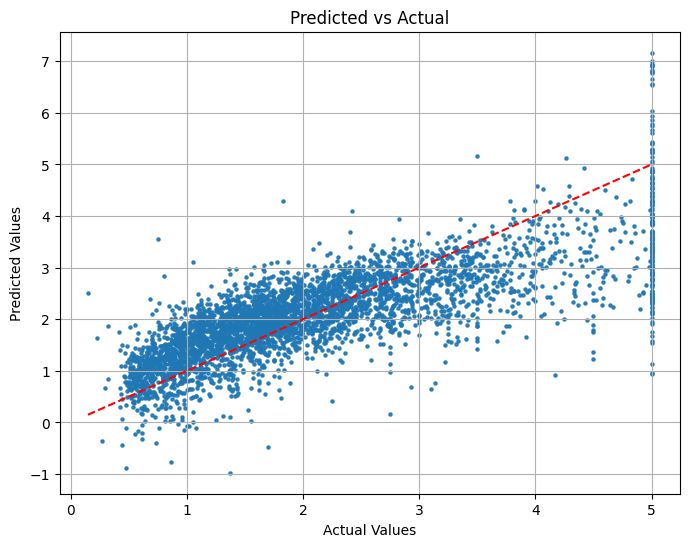

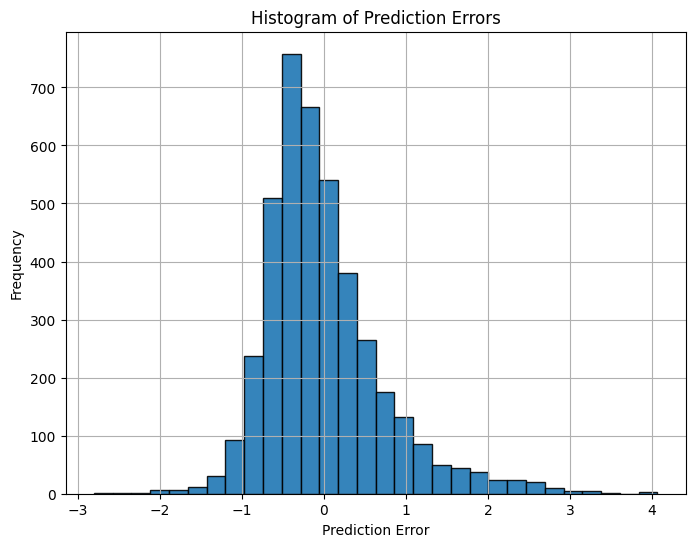

In [23]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print("Intercept:", model_lin.intercept_)
np.set_printoptions(precision=8, suppress=True)
print("Coefficients:", model_lin.coef_)
print("Standardized Coefficient", model_lin.coef_*X_train.std()/y_train.std())

y_pred_lin = model_lin.predict(X_test)
y_train_lin = model_lin.predict(X_train)

r2_lin_in = r2_score(y_train, y_train_lin)
mae_lin_in = mean_absolute_error(y_train, y_train_lin)
rmse_lin_in = np.sqrt(mean_squared_error(y_train, y_train_lin))

print("Training errors:")
print(f"R^2: {r2_lin_in:.4f}")
print(f"MAE: {mae_lin_in:.4f}")
print(f"RMSE: {rmse_lin_in:.4f}")


r2_lin_out = r2_score(y_test, y_pred_lin)
mae_lin_out = mean_absolute_error(y_test, y_pred_lin)
rmse_lin_out = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Testing errors:")
print(f"R^2: {r2_lin_out:.4f}")
print(f"MAE: {mae_lin_out:.4f}")
print(f"RMSE: {rmse_lin_out:.4f}")

errors = y_test - y_pred_lin

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

In [28]:
from sklearn.base import BaseEstimator, RegressorMixin

class ClippedRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimator, min_value=None, max_value=None):
        self.base_estimator = base_estimator
        self.min_value = min_value
        self.max_value = max_value

    def fit(self, X, y):
        self.base_estimator.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.base_estimator.predict(X)
        return np.clip(y_pred, self.min_value, self.max_value)


Coefficients: [ 0.42804429  0.00793582 -0.10317973  0.56140648  0.00000002 -0.00383381
 -0.37971286 -0.39465116]
Standardized Coefficient MedInc        0.687211
HouseAge      0.101538
AveRooms     -0.242553
AveBedrms     0.264608
Population    0.000028
AveOccup     -0.025829
Latitude     -0.834895
Longitude    -0.809864
dtype: float64
Training errors:
R^2: 0.6147
MAE: 0.5155
RMSE: 0.7181
Testing errors:
R^2: 0.6000
MAE: 0.5194
RMSE: 0.7222


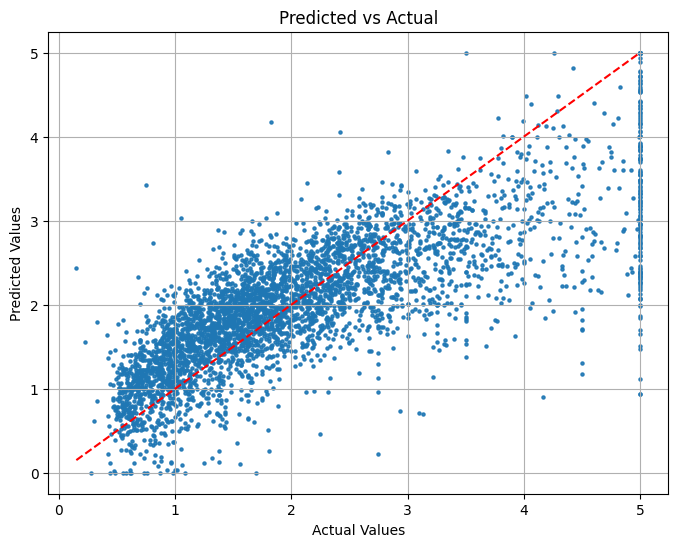

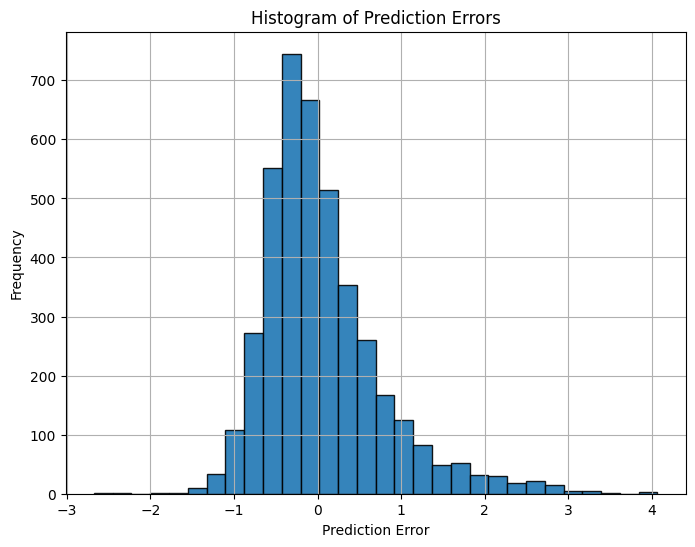

In [32]:
# Linear Regression (clipped+train on noncutoff)

mask = y_train != 5.000010
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]


model_lin = ClippedRegressor(LinearRegression(), min_value=0, max_value=5.00001)
model_lin.fit(X_train_filtered, y_train_filtered)

np.set_printoptions(precision=8, suppress=True)
print("Coefficients:", model_lin.base_estimator.coef_)
print("Standardized Coefficient", model_lin.base_estimator.coef_*X_train_filtered.std()/y_train_filtered.std())

y_pred_filtered_lin = model_lin.predict(X_test)
y_train_filtered_lin = model_lin.predict(X_train)

r2_lin_in = r2_score(y_train, y_train_filtered_lin)
mae_lin_in = mean_absolute_error(y_train, y_train_filtered_lin)
rmse_lin_in = np.sqrt(mean_squared_error(y_train, y_train_filtered_lin))

print("Training errors:")
print(f"R^2: {r2_lin_in:.4f}")
print(f"MAE: {mae_lin_in:.4f}")
print(f"RMSE: {rmse_lin_in:.4f}")


r2_lin_out = r2_score(y_test, y_pred_filtered_lin)
mae_lin_out = mean_absolute_error(y_test, y_pred_filtered_lin)
rmse_lin_out = np.sqrt(mean_squared_error(y_test, y_pred_filtered_lin))

print("Testing errors:")
print(f"R^2: {r2_lin_out:.4f}")
print(f"MAE: {mae_lin_out:.4f}")
print(f"RMSE: {rmse_lin_out:.4f}")

errors = y_test - y_pred_filtered_lin

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_filtered_lin, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()


In [ ]:
# Linear Regression + PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_PCR = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lr', LinearRegression())
])

param_grid = {
    'pca__n_components': list(range(1, X_train.shape[1]+1))
}

grid = GridSearchCV(pipeline_PCR, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print(f"Best number of principal components: {grid.best_params_['pca__n_components']}")

Best number of principal components: 8


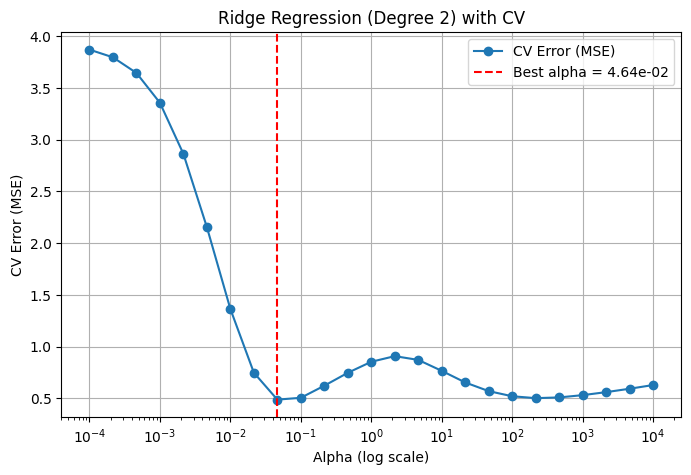

Best parameters: {'ridge__alpha': np.float64(0.046415888336127774)}
R2 train: 0.6831, test: 0.3378
RMSE train: 0.6512, test: 0.9293
MAE train: 0.4673, test: 0.4776
        MedInc  HouseAge  AveRooms  AveBedrms  Population     AveOccup  \
19006  10.2264      45.0  3.166667   0.833333      7460.0  1243.333333   
19435   0.5360      16.0  2.111111   2.111111       166.0    18.444444   
4861    0.4999      29.0  2.373272   1.055300      2690.0    12.396313   
12138   2.6250      16.0  4.000000   0.500000        39.0     2.785714   
10574   1.9659       6.0  4.795455   1.159091       125.0     2.840909   

       Latitude  Longitude   y_test     y_pred      Error  
19006     38.32    -121.98  1.37500 -40.651423  42.026423  
19435     37.67    -121.04  1.62500  -5.821074   7.446074  
4861      34.02    -118.28  5.00001  -1.423759   6.423769  
12138     33.87    -117.22  5.00001   1.163338   3.836672  
10574     33.72    -117.70  5.00001   1.272434   3.727576  


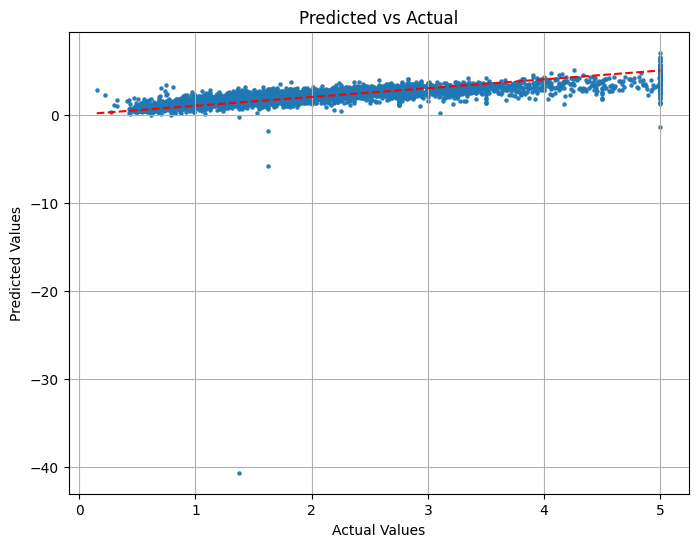

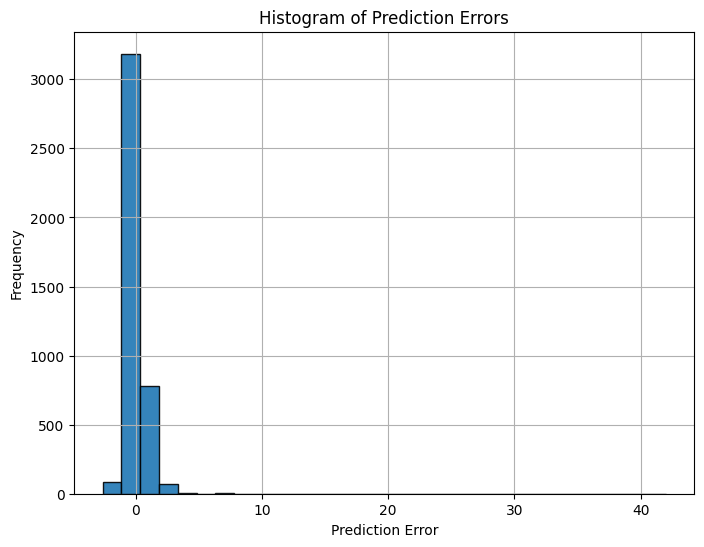

In [35]:
# Deg2 Poly + Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipeline_deg2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])
alphas = np.logspace(-4, 4, 25)
param_grid = {
    'ridge__alpha': alphas
}

grid = GridSearchCV(pipeline_deg2, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

mean_scores = -grid.cv_results_["mean_test_score"]

plt.figure(figsize=(8,5))
plt.semilogx(alphas, mean_scores, marker="o", label="CV Error (MSE)")
plt.axvline(grid.best_params_["ridge__alpha"], color="r", linestyle="--", label=f"Best alpha = {grid.best_params_['ridge__alpha']:.2e}")
plt.xlabel("Alpha (log scale)")
plt.ylabel("CV Error (MSE)")
plt.title("Ridge Regression (Degree 2) with CV")
plt.legend()
plt.grid(True)
plt.show()

best_model = grid.best_estimator_
y_train_deg2 = best_model.predict(X_train)
y_pred_deg2 = best_model.predict(X_test)

# Performance metrics
r2_deg2_in = r2_score(y_train, y_train_deg2)
r2_deg2_out = r2_score(y_test, y_pred_deg2)
mae_deg2_in = mean_absolute_error(y_train, y_train_deg2)
mae_deg2_out = mean_absolute_error(y_test, y_pred_deg2)
rmse_deg2_in = np.sqrt(mean_squared_error(y_train, y_train_deg2))
rmse_deg2_out = np.sqrt(mean_squared_error(y_test, y_pred_deg2))

print("Best parameters:", grid.best_params_)
print(f"R2 train: {r2_deg2_in :.4f}, test: {r2_deg2_out:.4f}")
print(f"RMSE train: {rmse_deg2_in:.4f}, test: {rmse_deg2_out:.4f}")
print(f"MAE train: {mae_deg2_in:.4f}, test: {mae_deg2_out:.4f}")


errors_deg2 = y_test.to_numpy() - y_pred_deg2

top5_idx = np.argsort(np.abs(errors_deg2))[-5:][::-1]

top5_y_test = y_test.iloc[top5_idx].values
top5_y_pred = y_pred_deg2[top5_idx]
top5_errors = errors_deg2[top5_idx]

top5_X = X_test.iloc[top5_idx]

outliers_df = top5_X.copy()
outliers_df["y_test"] = top5_y_test
outliers_df["y_pred"] = top5_y_pred
outliers_df["Error"] = top5_errors

print(outliers_df)



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_deg2, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors_deg2, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

R2 train: 0.6945, test: 0.6880
RMSE train: 0.6394, test: 0.6378
MAE train: 0.4457, test: 0.4465
       MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
4861   0.4999      29.0  2.373272   1.055300      2690.0  12.396313     34.02   
12138  2.6250      16.0  4.000000   0.500000        39.0   2.785714     33.87   
10574  1.9659       6.0  4.795455   1.159091       125.0   2.840909     33.72   
6651   1.9923      41.0  3.279373   1.062663       855.0   2.232376     34.15   
16642  0.7025      19.0  2.425197   1.125984      1799.0   2.833071     35.30   

       Longitude   y_test    y_pred     Error  
4861     -118.28  5.00001  0.000000  5.000010  
12138    -117.22  5.00001  1.195250  3.804760  
10574    -117.70  5.00001  1.302768  3.697242  
6651     -118.14  5.00001  1.690182  3.309828  
16642    -120.67  5.00001  1.786403  3.213607  


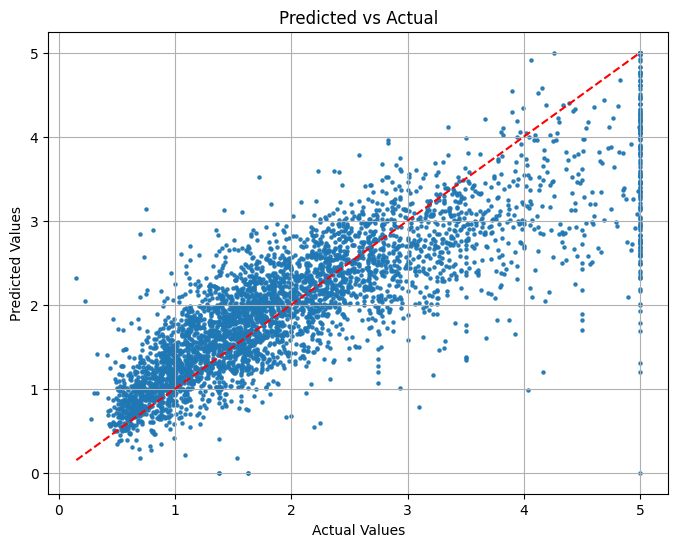

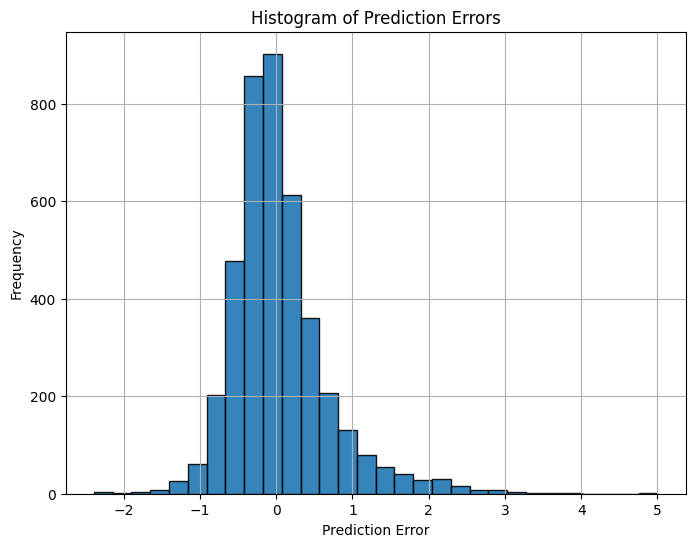

In [33]:
# Deg2 Poly + Ridge + filtered

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# mask
mask = y_train <5.00001;
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

final_model = ClippedRegressor(
    Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=0))
    ]),
    min_value=0, max_value=5.00001
)
final_model.fit(X_train_filtered, y_train_filtered)

y_train_filtered_deg2 = final_model.predict(X_train)
y_pred_filtered_deg2 = final_model.predict(X_test)

# Performance metrics
r2_deg2_in = r2_score(y_train, y_train_filtered_deg2)
r2_deg2_out = r2_score(y_test, y_pred_filtered_deg2)
mae_deg2_in = mean_absolute_error(y_train, y_train_filtered_deg2)
mae_deg2_out = mean_absolute_error(y_test, y_pred_filtered_deg2)
rmse_deg2_in = np.sqrt(mean_squared_error(y_train, y_train_filtered_deg2))
rmse_deg2_out = np.sqrt(mean_squared_error(y_test, y_pred_filtered_deg2))


print(f"R2 train: {r2_deg2_in :.4f}, test: {r2_deg2_out:.4f}")
print(f"RMSE train: {rmse_deg2_in:.4f}, test: {rmse_deg2_out:.4f}")
print(f"MAE train: {mae_deg2_in:.4f}, test: {mae_deg2_out:.4f}")


errors_deg2 = y_test.to_numpy() - y_pred_filtered_deg2

top5_idx = np.argsort(np.abs(errors_deg2))[-5:][::-1]

top5_y_test = y_test.iloc[top5_idx].values
top5_y_pred = y_pred_filtered_deg2[top5_idx]
top5_errors = errors_deg2[top5_idx]

top5_X = X_test.iloc[top5_idx]

outliers_df = top5_X.copy()
outliers_df["y_test"] = top5_y_test
outliers_df["y_pred"] = top5_y_pred
outliers_df["Error"] = top5_errors

print(outliers_df)



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_filtered_deg2, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors_deg2, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

Classification Accuracy (train): 0.9883720930232558
Classification Accuracy (test): 0.9738372093023255
R2 train: 0.5849, test: 0.6886
RMSE train: 0.7454, test: 0.6372
MAE train: 0.4434, test: 0.4346
       MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
4861   0.4999      29.0  2.373272   1.055300      2690.0  12.396313     34.02   
19806  0.8362      17.0  8.471698   2.849057       141.0   2.660377     40.07   
7535   1.6437      24.0  4.307479   1.124654      1665.0   4.612188     33.92   
12423  2.9286      22.0  2.814286   0.771429       331.0   4.728571     33.69   
12138  2.6250      16.0  4.000000   0.500000        39.0   2.785714     33.87   

       Longitude   y_test   y_pred    Error  
4861     -118.28  5.00001  0.00000  5.00001  
19806    -123.41  0.87500  5.00001 -4.12501  
7535     -118.23  0.98800  5.00001 -4.01201  
12423    -116.15  1.12500  5.00001 -3.87501  
12138    -117.22  5.00001  1.19525  3.80476  


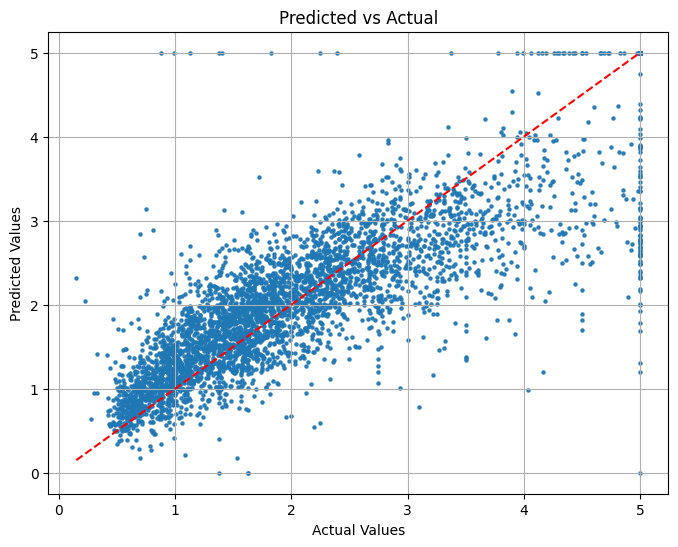

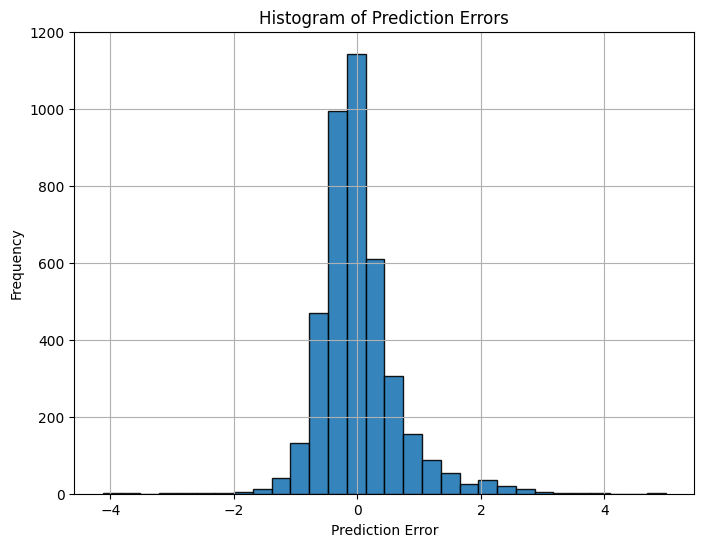

In [24]:
# classification + regression

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from xgboost import XGBClassifier

# classification

y_train_class = (y_train == 5.00001).astype(int)
y_test_class = (y_test == 5.00001).astype(int)

clf = GradientBoostingClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train_class)

y_train_class_pred = clf.predict(X_train)
y_test_class_pred = clf.predict(X_test)

print("Classification Accuracy (train):", accuracy_score(y_train_class, y_train_class_pred))
print("Classification Accuracy (test):", accuracy_score(y_test_class, y_test_class_pred))

# mask

mask_train_reg = y_train_class == 0
mask_test_reg = y_test_class_pred == 0
mask = y_train < 5.00001

X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

X_train_reg = X_train[mask_train_reg]
y_train_reg = y_train[mask_train_reg]

X_test_reg = X_test[mask_test_reg]


# regression

model = ClippedRegressor(
    Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=0))
    ]),
    min_value=0, max_value=5.00001
)
model.fit(X_train_filtered, y_train_filtered)

y_train_reg_deg2 = model.predict(X_train_reg)
y_pred_reg_deg2 = model.predict(X_test_reg)


# train
y_train_deg2 = np.where(y_train_class_pred==1, 5.00001, 0)
y_train_deg2[mask_train_reg] = y_train_reg_deg2

# test
y_pred_deg2 = np.where(y_test_class_pred==1, 5.00001, 0)
y_pred_deg2[mask_test_reg] = y_pred_reg_deg2


# Performance metrics
r2_deg2_in = r2_score(y_train, y_train_deg2)
r2_deg2_out = r2_score(y_test, y_pred_deg2)
mae_deg2_in = mean_absolute_error(y_train, y_train_deg2)
mae_deg2_out = mean_absolute_error(y_test, y_pred_deg2)
rmse_deg2_in = np.sqrt(mean_squared_error(y_train, y_train_deg2))
rmse_deg2_out = np.sqrt(mean_squared_error(y_test, y_pred_deg2))


print(f"R2 train: {r2_deg2_in :.4f}, test: {r2_deg2_out:.4f}")
print(f"RMSE train: {rmse_deg2_in:.4f}, test: {rmse_deg2_out:.4f}")
print(f"MAE train: {mae_deg2_in:.4f}, test: {mae_deg2_out:.4f}")


errors_deg2 = y_test.to_numpy() - y_pred_deg2

top5_idx = np.argsort(np.abs(errors_deg2))[-5:][::-1]

top5_y_test = y_test.iloc[top5_idx].values
top5_y_pred = y_pred_deg2[top5_idx]
top5_errors = errors_deg2[top5_idx]

top5_X = X_test.iloc[top5_idx]

outliers_df = top5_X.copy()
outliers_df["y_test"] = top5_y_test
outliers_df["y_pred"] = top5_y_pred
outliers_df["Error"] = top5_errors

print(outliers_df)



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_deg2, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors_deg2, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

Coefficients: [ 0.42804429  0.00793582 -0.10317973  0.56140648  0.00000002 -0.00383381
 -0.37971286 -0.39465116]
Standardized Coefficient MedInc        0.687211
HouseAge      0.101538
AveRooms     -0.242553
AveBedrms     0.264608
Population    0.000028
AveOccup     -0.025829
Latitude     -0.834895
Longitude    -0.809864
dtype: float64
R2 train: 0.5276, test: 0.6135
RMSE train: 0.7951, test: 0.7099
MAE train: 0.5026, test: 0.5004
        MedInc  HouseAge  AveRooms  AveBedrms  Population     AveOccup  \
19806   0.8362      17.0  8.471698   2.849057       141.0     2.660377   
4861    0.4999      29.0  2.373272   1.055300      2690.0    12.396313   
12138   2.6250      16.0  4.000000   0.500000        39.0     2.785714   
7535    1.6437      24.0  4.307479   1.124654      1665.0     4.612188   
10574   1.9659       6.0  4.795455   1.159091       125.0     2.840909   
12423   2.9286      22.0  2.814286   0.771429       331.0     4.728571   
19006  10.2264      45.0  3.166667   0.833333    

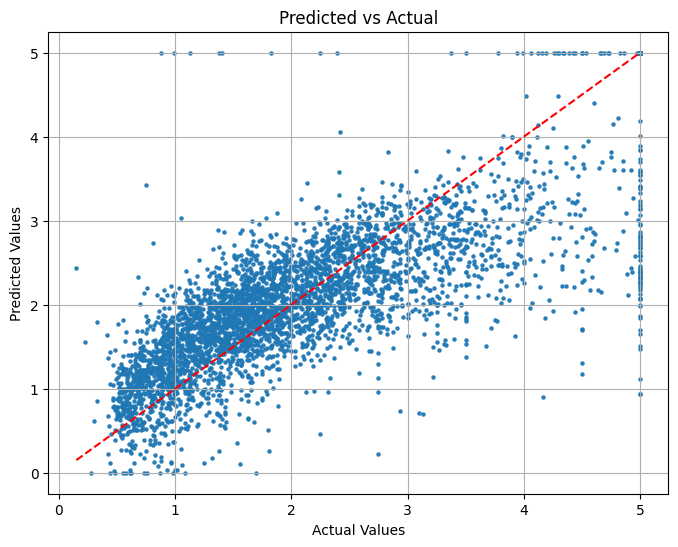

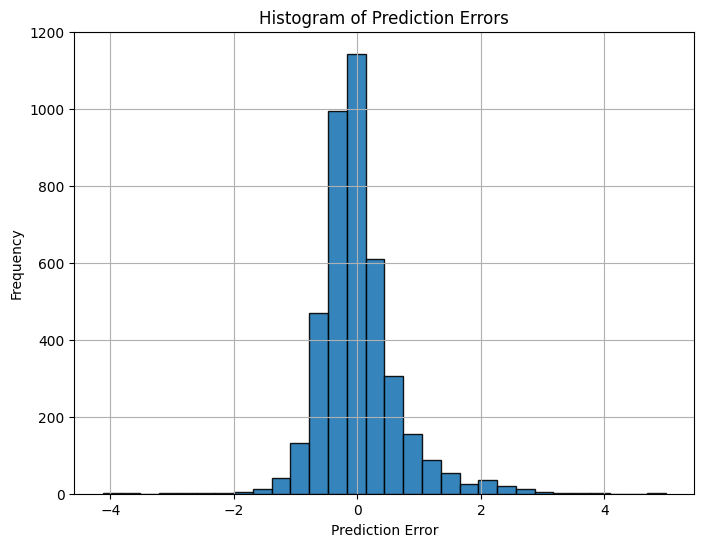

In [25]:
# regression

model = ClippedRegressor(LinearRegression(),
    min_value=0, max_value=5.00001
)
model.fit(X_train_filtered, y_train_filtered)
print("Coefficients:", model.base_estimator.coef_)
print("Standardized Coefficient", model.base_estimator.coef_*X_train_filtered.std()/y_train_filtered.std())


y_train_reg_lin = model.predict(X_train_reg)
y_pred_reg_lin = model.predict(X_test_reg)


# train
y_train_lin = np.where(y_train_class_pred==1, 5.00001, 0)
y_train_lin[mask_train_reg] = y_train_reg_lin

# test
y_pred_lin = np.where(y_test_class_pred==1, 5.00001, 0)
y_pred_lin[mask_test_reg] = y_pred_reg_lin


# Performance metrics
r2_deg2_in = r2_score(y_train, y_train_lin)
r2_deg2_out = r2_score(y_test, y_pred_lin)
mae_deg2_in = mean_absolute_error(y_train, y_train_lin)
mae_deg2_out = mean_absolute_error(y_test, y_pred_lin)
rmse_deg2_in = np.sqrt(mean_squared_error(y_train, y_train_lin))
rmse_deg2_out = np.sqrt(mean_squared_error(y_test, y_pred_lin))


print(f"R2 train: {r2_deg2_in :.4f}, test: {r2_deg2_out:.4f}")
print(f"RMSE train: {rmse_deg2_in:.4f}, test: {rmse_deg2_out:.4f}")
print(f"MAE train: {mae_deg2_in:.4f}, test: {mae_deg2_out:.4f}")


errors_lin = y_test.to_numpy() - y_pred_lin

top5_idx = np.argsort(np.abs(errors_lin))[-10:][::-1]

top5_y_test = y_test.iloc[top5_idx].values
top5_y_pred = y_pred_lin[top5_idx]
top5_errors = errors_lin[top5_idx]

top5_X = X_test.iloc[top5_idx]

outliers_df = top5_X.copy()
outliers_df["y_test"] = top5_y_test
outliers_df["y_pred"] = top5_y_pred
outliers_df["Error"] = top5_errors

print(outliers_df)



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors_deg2, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y_train_label = (y_train == 5.00001).astype(int)

filter = y_train_label == 1
print(y_train_label[filter].shape)

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest (100)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Random Forest (200)": RandomForestClassifier(n_estimators=200, random_state=42),
    "Random Forest (300)": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting (100)": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting (200)": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting (300)": GradientBoostingClassifier(n_estimators=300, random_state=42),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# k-fold CV (k=5)
k = 5
cv_results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train_label, cv=k, scoring='accuracy')
    cv_results[name] = (np.mean(scores), np.std(scores))

print("Classifier CV Results (Accuracy):")
for name, (mean_acc, std_acc) in cv_results.items():
    print(f"{name}: {mean_acc:.4f} ± {std_acc:.4f}")


(784,)


KeyboardInterrupt: 

(784,)


# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
